<a href="https://colab.research.google.com/github/Franco-Urrutia-G/EIE401-1s-2024/blob/main/Actividades/Actividad%207/Actividad_7_UrrutiaFranco_18916762-8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 7</h2></center>
<center><h3>Image</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Franco Urrutia Ghiardo</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Operaciones usando Pytorch y OpenCV

### 1.1 Instala Numpy, Pytorch y OpenCV:
- Carga una imagen desde un archivo con extensión JPG, usando numpy, pytorch y opencv.
- Presenta la imagen
- Transforma la imagen de color a escala de grises usando cada uno de los paquetes
- Guarda la imagen nueva.
- Presenta la imagen transformada en el notebook.

<p align="justify">
Asegurate de presentar adecuandamente la imagen, usando Matplotlib u otro medio de ploteo.

In [ ]:
pip install numpy opencv-python-headless torch matplotlib


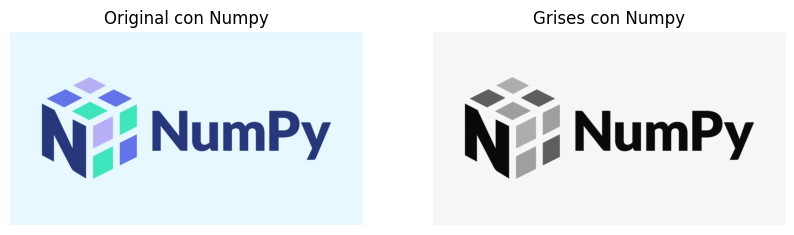

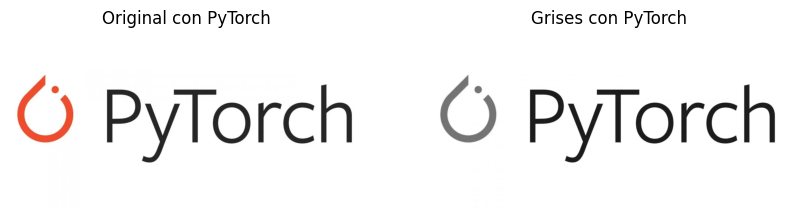

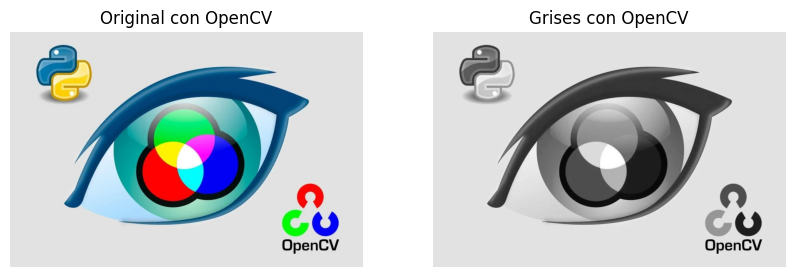

In [32]:
import numpy as np
import torch
import cv2
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# Rutas de las imágenes
rutas = {
    'numpy': '/content/Numpy.jpg',
    'pytorch': '/content/Pytorch.jpg',
    'opencv': '/content/opencv.jpg'
}

# Mostrar imagen original y en escala de grises
def mostrar(original, gray, title_original, title_gray):

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray' if len(original.shape) == 2 else None)
    plt.title(title_original)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(gray, cmap='gray')
    plt.title(title_gray)
    plt.axis('off')

    plt.show()

# Procesar imagen con numpy
image_np = plt.imread(rutas['numpy'])
# Convertir la imagen a escala de grises
gray_np = np.dot(image_np[...,:3], [0.2989, 0.5870, 0.1140])
plt.imsave('imagen_gris_numpy.jpg', gray_np, cmap='gray')
mostrar(image_np, gray_np, 'Original con Numpy', 'Grises con Numpy')

# Procesar imagen con pytorch
image_pytorch = Image.open(rutas['pytorch'])
transform = transforms.ToTensor()
image_torch_tensor = transform(image_pytorch)
# Transformar a escala de grises
gray_torch = 0.2989 * image_torch_tensor[0, :, :] + 0.5870 * image_torch_tensor[1, :, :] + 0.1140 * image_torch_tensor[2, :, :]
plt.imsave('imagen_gris_pytorch.jpg', gray_torch.numpy(), cmap='gray')
mostrar(np.array(image_pytorch), gray_torch.numpy(), 'Original con PyTorch', 'Grises con PyTorch')


# Procesar imagen con opencv
image_cv2 = cv2.imread(rutas['opencv'])
image_cv2_rgb = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)  # Convertir la imagen de BGR a RGB
# Transformar a escala de grises
gray_cv2 = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2GRAY)
cv2.imwrite('imagen_gris_opencv.jpg', gray_cv2)
mostrar(image_cv2_rgb, gray_cv2, 'Original con OpenCV', 'Grises con OpenCV')


## 2. Multiples operaciones con tensores
### ¡USA LA IMAGEN ADJUNTA image.png!

#### 2.1 Aplica una transformación puntual. Modifica el valor de los pixeles considerando un valor de umbral (threshold). la función de treshold debe ser una rampa con una pendiente dada (tu defines el valor de la pendiente) y cuyo valor mínimo será 0 y el máximo será 255 (valores típicos de los pixeles).

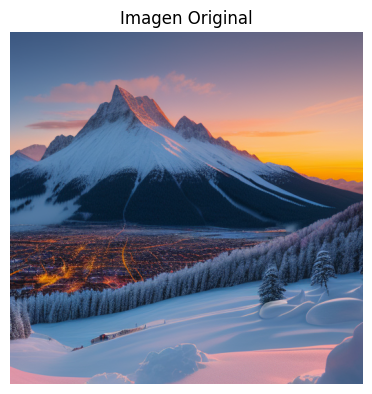

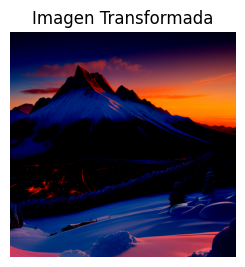

In [33]:
import numpy as np
import torch
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt



# Función para mostrar la imagen
def mostrar(imagen, titulo):
    plt.imshow(imagen)
    plt.title(titulo)
    plt.axis('off')
    plt.show()
def aplicar_umbral_torch(image_tensor, umbral, pendiente):

    image_transformada = torch.clamp(pendiente * (image_tensor - umbral / 255.0), 0, 1)

    return image_transformada

ruta_imagen = '/content/image.png'

# Cargar la imagen y convertirla a tensor
image_pil = Image.open(ruta_imagen).convert('RGB')
transform_to_tensor = transforms.ToTensor()
image_tensor = transform_to_tensor(image_pil)



umbral = 120
pendiente = 2

# Aplicar la función de umbral a la imagen
imagen_transformada_tensor = aplicar_umbral_torch(image_tensor, umbral, pendiente)

# Convertir el tensor de vuelta a imagen
transform_to_pil = transforms.ToPILImage()
imagen_transformada = transform_to_pil(imagen_transformada_tensor)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
mostrar(image_pil, 'Imagen Original')

plt.subplot(1, 2, 2)
mostrar(imagen_transformada, 'Imagen Transformada')



#### 2.2 Aplica una transformación en la vecindad.
- Debes hacer una vecindad con dimensiones de 5x5 pixeles.
- Aplica la transformación de tal forma que los pixeles cambien para tener el valor correspondiente al máximo de todos los vecinos.
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.



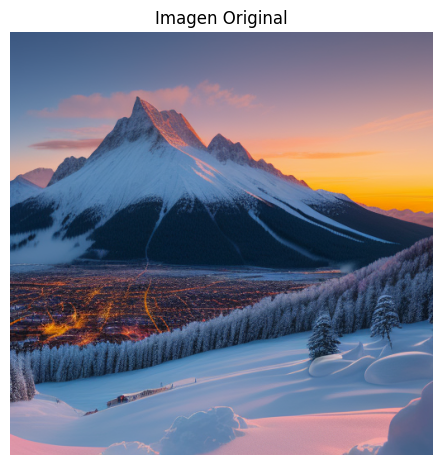

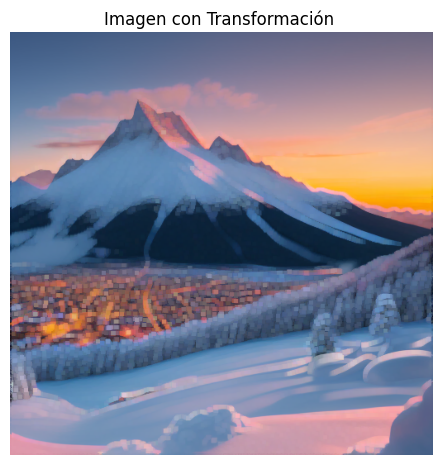

In [41]:
import numpy as np
import torch
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

ruta_imagen = '/content/image.png'

# mostrar la imagen
def mostrar(imagen, titulo):
    plt.imshow(imagen)
    plt.title(titulo)
    plt.axis('off')
    plt.show()

# Cargar la imagen y convertirla a tensor
image_pil = Image.open(ruta_imagen).convert('RGB')
transform_to_tensor = transforms.ToTensor()
image_tensor = transform_to_tensor(image_pil)

# Definir la  transformación
def transformacion_vecindad(image_tensor):

    # Obtener dimensiones
    _, height, width = image_tensor.size()

    # Crear tensor
    image_transformada = image_tensor.clone()


    for y in range(2, height - 2):
        for x in range(2, width - 2):
            vecindad = image_tensor[:, y-2:y+3, x-2:x+3]
            maximo_valor, _ = torch.max(vecindad.reshape(3, -1), dim=1)
            maximo_valor = maximo_valor.reshape(3, 1, 1)
            image_transformada[:, y, x] = maximo_valor[:, 0, 0]

    return image_transformada

imagen_transformada_tensor = transformacion_vecindad(image_tensor)

# Convertir el tensor vuelta a imagen
transform_to_pil = transforms.ToPILImage()
imagen_transformada = transform_to_pil(imagen_transformada_tensor)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
mostrar(image_pil, 'Imagen Original')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
mostrar(imagen_transformada, 'Imagen con Transformación ')

imagen_transformada.save('/content/imagen_transformada_vecindad.png')


#### 2.3 Aplica transformación de intensidad
- Debes hacer una vecindad con dimensiones de 10x10 pixeles.
- Aplica la transformación que aparece en la ecuación de tal forma que los pixeles cambien dependiendo de la posición (r) y el coeficiente c (de tu elección).
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.

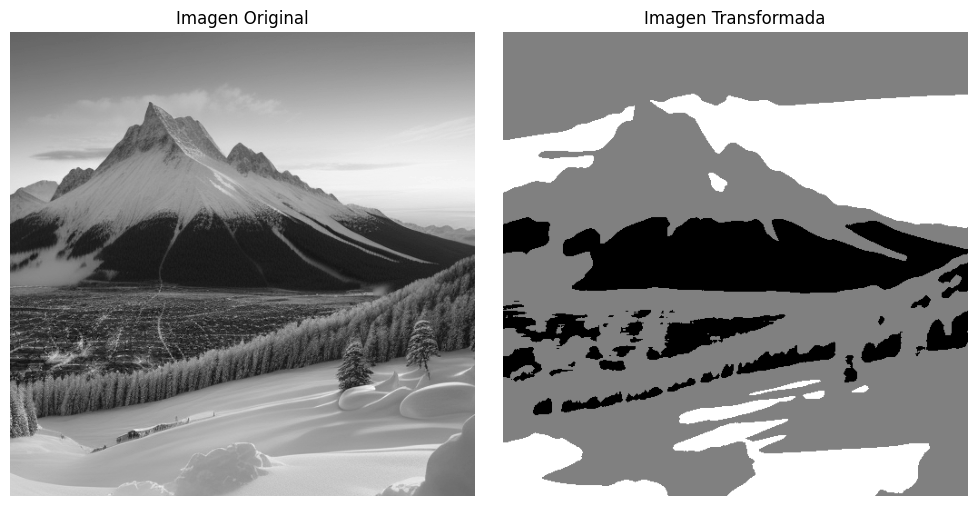

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)

height, width = image.shape


Vecindad = 10

c = 1.0

# contenedor nueva imagen
imagen_transform = np.zeros_like(image, dtype=np.float32)

for y in range(height):
    for x in range(width):
        # limites
        y_min = max(0, y - Vecindad // 2)
        y_max = min(height, y + Vecindad // 2 + 1)
        x_min = max(0, x - Vecindad // 2)
        x_max = min(width, x + Vecindad // 2 + 1)


        media_vecindad = np.mean(image[y_min:y_max, x_min:x_max])

        # c*log(r)
        if media_vecindad > 0:
            valor_transformado = c * np.log(media_vecindad)
        else:
            valor_transformado = 0

        imagen_transform[y, x] = valor_transformado

# volver a valores tipo imagen
imagen_transform = np.clip(imagen_transform, 0, 255).astype(np.uint8)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_transform, cmap='gray')
plt.title('Imagen Transformada')
plt.axis('off')

plt.tight_layout()
plt.show()


#### 2.4 Operación con Kernel
- Realiza tres operaciones de convolución en cascada.
- Utiliza torch nn.Conv2d
- Debes calcular el stride, padding y demás parámetros para que obtengas 16 canales de salida.
- Muestra una imagen de cada canal resultante de la convolución.

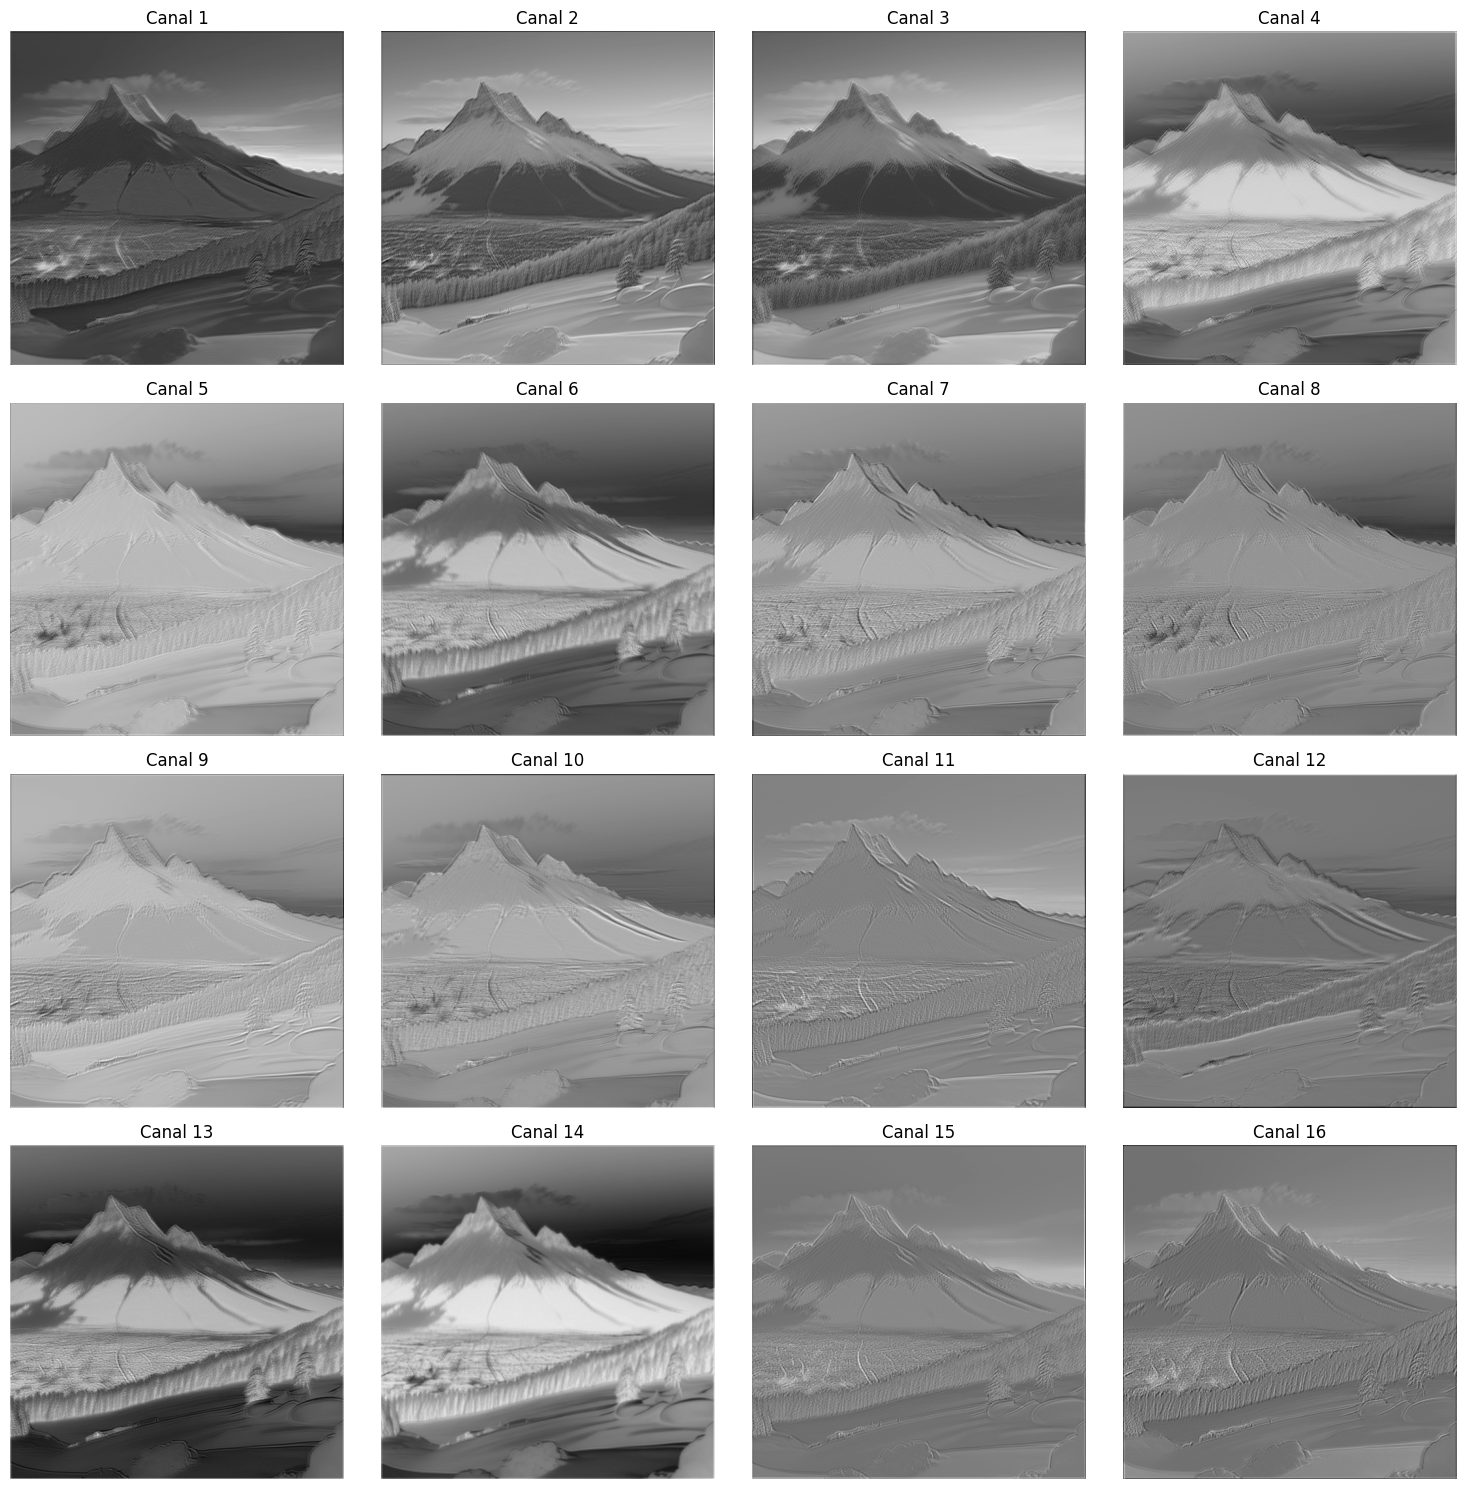

In [36]:
import torch
import torch.nn as nn
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('image.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_tensor = torch.tensor(image_rgb).permute(2, 0, 1).unsqueeze(0).float() / 255.0

# Definir capas de convolución
conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, stride=1, padding=1)
conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
conv3 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1)

# Aplicar las convoluciones en cascada
conv1_output = conv1(image_tensor)
conv2_output = conv2(conv1_output)
conv3_output = conv3(conv2_output)

# Visualizar
conv3_output_np = conv3_output.squeeze(0).detach().numpy()

plt.figure(figsize=(15, 15))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(conv3_output_np[i], cmap='gray')
    plt.title(f'Canal {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


## 3. Realiza la inversión de imagen

### 3.1 Utilizando estrictamente numpy, busca y usa una imagen binaria y realizar la inversión de dicha imagen.
### Recuerda adjuntar la imagen a la entrega de tu trabajo.


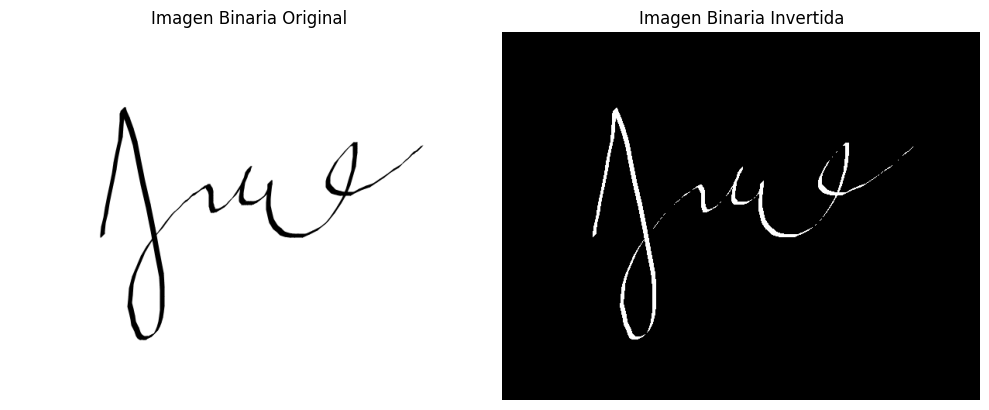

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread, imsave

ruta = 'binaria.png'

imagen = imread(ruta)

# Si los valores están en el rango [0, 1], convertir a [0, 255]
if imagen.max() <= 1.0:
    imagen = (imagen * 255).astype(np.uint8)
else:
    imagen = imagen.astype(np.uint8)

# Invertir la imagen binaria
invertida = np.where(imagen == 0, 255, 0).astype(np.uint8)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Binaria Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(invertida, cmap='gray')
plt.title('Imagen Binaria Invertida')
plt.axis('off')

plt.tight_layout()
plt.show()

ruta_guardado = 'binaria_invertida_numpy.png'
imsave(ruta_guardado, invertida, cmap='gray')



### 3.1 Usando Pytorch y opencv, realiza la inversión de la misma imagen.



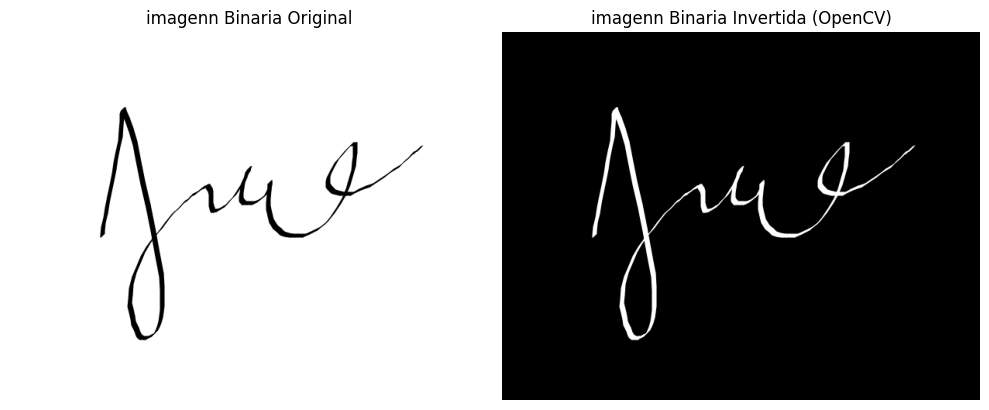

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

ruta = 'binaria.png'

imagen = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)


# Invertir
inverted_imagen_cv = cv2.bitwise_not(imagen)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title('imagenn Binaria Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(inverted_imagen_cv, cmap='gray')
plt.title('imagenn Binaria Invertida (OpenCV)')
plt.axis('off')

plt.tight_layout()
plt.show()
ruta_guardado = 'binaria_invertida_cv.png'
imsave(ruta_guardado, invertida, cmap='gray')


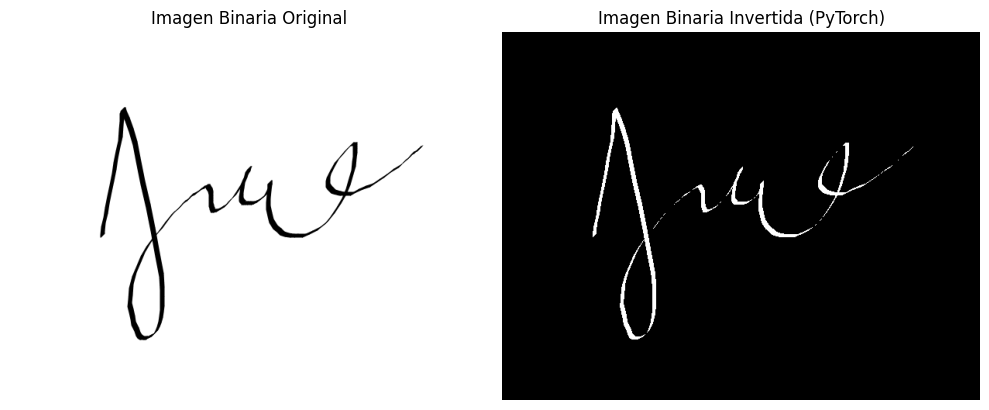

In [39]:
import torch

image_tensor = torch.tensor(imagen, dtype=torch.uint8)

# Invertir la imagen binaria usando PyTorch
inverted_image_tensor = torch.where(image_tensor == 0, torch.tensor(255, dtype=torch.uint8), torch.tensor(0, dtype=torch.uint8))

# Convertir el tensor invertido de vuelta a un numpy array para visualización
inverted_image_pt = inverted_image_tensor.numpy()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Binaria Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(inverted_image_pt, cmap='gray')
plt.title('Imagen Binaria Invertida (PyTorch)')
plt.axis('off')

plt.tight_layout()
plt.show()

ruta_guardado = 'binaria_invertida_pytorch.png'
imsave(ruta_guardado, invertida, cmap='gray')


## 4. Segmentación de imagen
#### 4.1 Realiza un algoritmo para dividir una imagen con 3 canales RGB de 512x512, en parches (secciones) de 16x16. Presenta cada parche generado de la imagen.
El algoritmo debe tolerar el cambio de imagen por una de menor tamano (128, 64). Claramente, en cada caso el número de parches será menor.
    

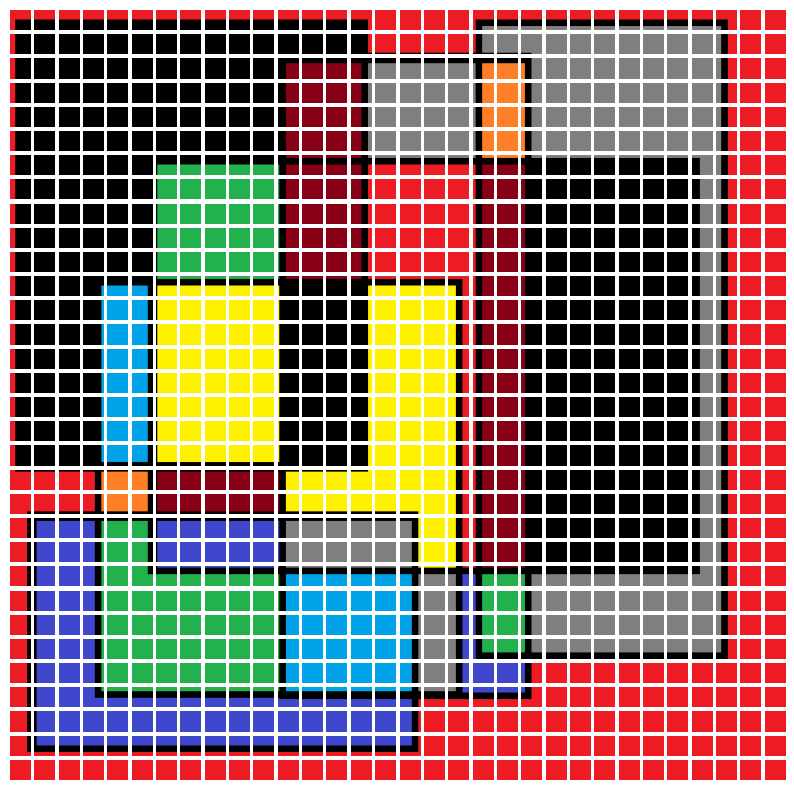

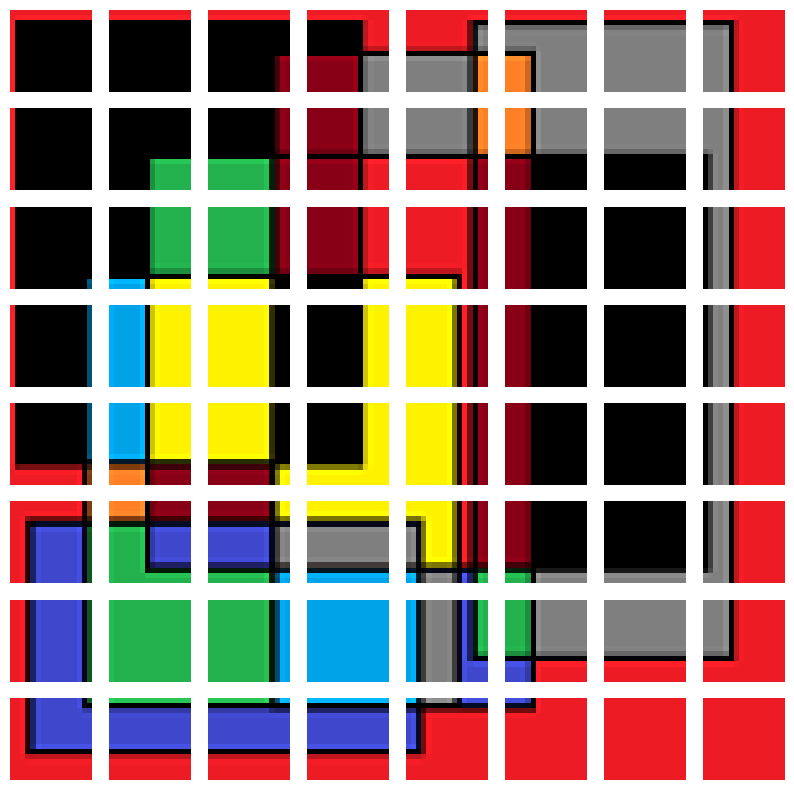

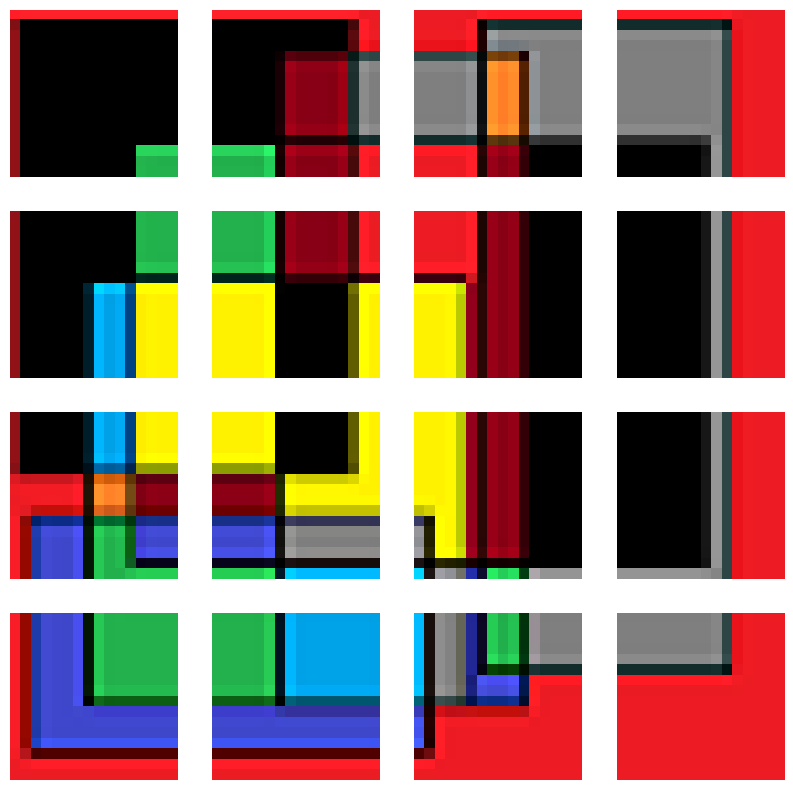

In [40]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def dividir_imagen_en_parches(imagen, tam_parche=16):
    # Convertir la imagen a una matriz
    matriz_imagen = np.array(imagen)
    filas, columnas, canales = matriz_imagen.shape

    # Verificar dimensiones
    assert filas % tam_parche == 0 and columnas % tam_parche == 0, "Numero de parrche no compatible"

    # Calcular el número de parches
    num_parches_filas = filas // tam_parche
    num_parches_columnas = columnas // tam_parche

    parches = []

    # Dividir la imagen
    for i in range(num_parches_filas):
        for j in range(num_parches_columnas):
            parche = matriz_imagen[i*tam_parche:(i+1)*tam_parche, j*tam_parche:(j+1)*tam_parche]
            parches.append(parche)

    return parches

def mostrar_parches(parches, tam_parche=16):
    num_parches = len(parches)
    num_parches_filas = int(np.sqrt(num_parches))

    fig, axs = plt.subplots(num_parches_filas, num_parches_filas, figsize=(10, 10))

    for idx, parche in enumerate(parches):
        i = idx // num_parches_filas
        j = idx % num_parches_filas
        axs[i, j].imshow(parche)
        axs[i, j].axis('off')

    plt.show()

imagenes = ['512.png', '128.png', '64.png']

for nombre_imagen in imagenes:

    imagen = Image.open(nombre_imagen)

    # Dividir la imagen
    parches = dividir_imagen_en_parches(imagen)

    mostrar_parches(parches)


## 5. Referencias
<p align="justify">
    
[OpenCV] https://docs.opencv.org/4.x/d7/da8/tutorial_table_of_content_imgproc.html

[inversion] https://medium.com/analytics-vidhya/inverting-an-image-using-numpys-broadcasting-method-1f5beb7f9fa5#:~:text=In%20order%20to%20invert%20the,negation)%20operation%20to%20the%20image.

[Imagen Numpy] https://datascientest.com/es/numpy-la-biblioteca-python

[Imagen Pytorch] https://medium.com/@luigi.fiori.lf0303/deep-neural-networks-with-pytorch-681cd0f6ddac

[Imagen OpenCv] https://cursodeinstalador.com/que-es-opencv/

[Formula de inversión a greyscale] https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.convert

[Image.png] https://github.com/Jorgecardenas1/EIE_401_MULTIMEDIA/tree/main/Actividades/Actividad%207

[Otras imagenes] Creación propia